# Linear Regression - STOCASTIC GRADIENT DESCENT(UNIVARIATE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data1.txt')

In [3]:
X_train = df.iloc[:,0]
Y_train = df.iloc[:,1]

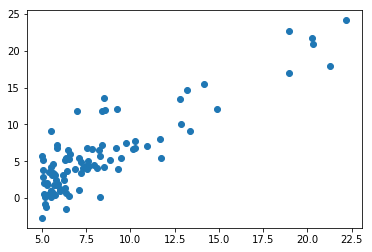

In [4]:
plt.scatter(X_train,Y_train)
plt.show()

Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima is reached. Hence, it becomes computationally very expensive to perform.

This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

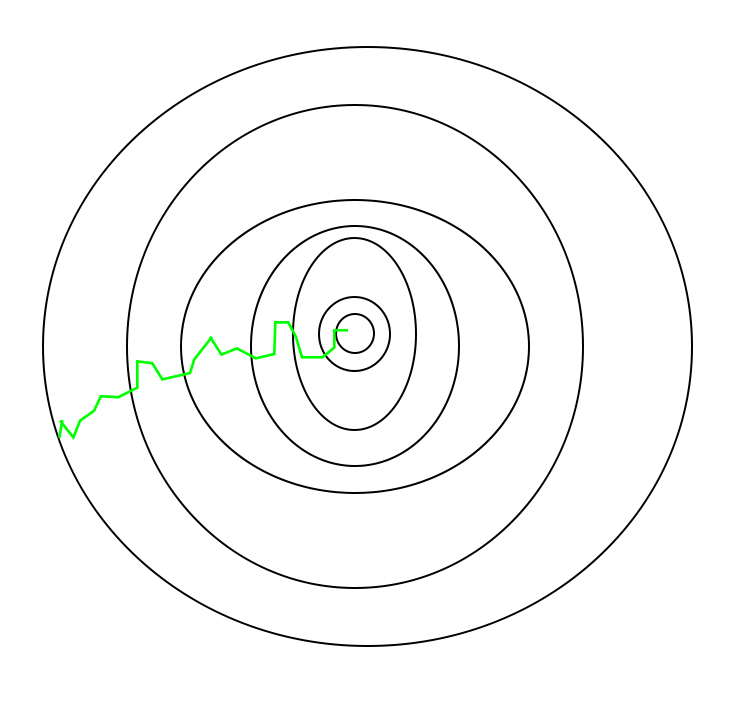

In [5]:
#Path taken by Stochastic Gradient Descent 
from IPython.display import Image
Image(filename='sgd-1.jpg')

In [6]:
#Hypothesis
def hypothesis(theta, X):
    h = np.ones((X.shape[0],1))
    for i in range(0,X.shape[0]):
        x = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(X.shape[0])
    return h

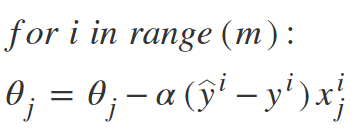

In [7]:
from IPython.display import Image
Image(filename='sgd-algorithm.png')

In [8]:
#Stocastic Grdient descent
def SGD(theta, alpha, num_iters, h, X, y):
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha) * (h - y)
        theta[1] = theta[1] - (alpha) * ((h - y) * X)
        h = theta[1]*X + theta[0] 
    return theta

In [9]:
def sgd_linear_regression(X, y, alpha, num_iters):
    # initializing the parameter vector...
    theta = np.zeros(2)
    # hypothesis calculation....
    h = hypothesis(theta, X)    
    # returning the optimized parameters by Gradient Descent...
    for i in range(0, X.shape[0]):
        theta = SGD(theta,alpha,num_iters,h[i],X[i],y[i])
    theta = theta.reshape(1, 2)
    return theta   

In [10]:
theta = sgd_linear_regression(X_train, Y_train, 0.0001, 100000)

In [11]:
theta

array([[-0.66794644,  0.23634726]])

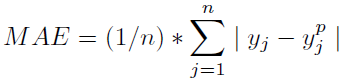

In [12]:
from IPython.display import Image
Image(filename='1.png')

In [13]:
# Mean Absolute Error
training_predictions = hypothesis(theta, X_train)
ae = 0 # Absolute Error
for i in range(0,Y_train.shape[0]):
    ae = ae + abs(training_predictions[i] - Y_train[i])
MAE = ae/Y_train.shape[0] # Mean Absolute Error

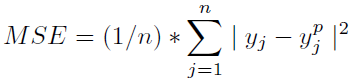

In [14]:
from IPython.display import Image
Image(filename='2.png')

In [15]:
# Mean Square Error
from math import *
se = 0 # Square Error
for i in range(0,Y_train.shape[0]):
    se = se + pow((training_predictions[i] - Y_train[i]), 2)
MSE = se/Y_train.shape[0] # Mean Square Error

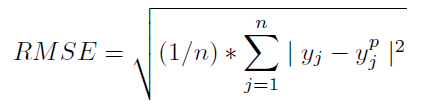

In [16]:
from IPython.display import Image
Image(filename='3.png')

In [17]:
from math import *
RMSE = sqrt(MSE) # Root Mean Square Error

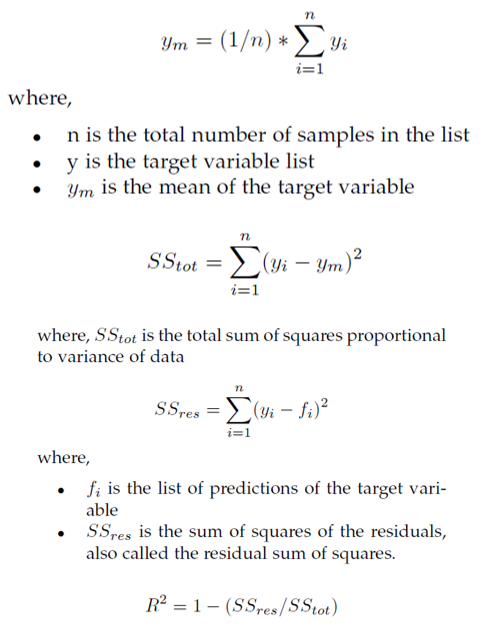

In [18]:
from IPython.display import Image
Image(filename='4.png')

In [19]:
import numpy as np
y_m = np.mean(Y_train)
SStot = 0
for i in range(0,Y_train.shape[0]):
    SStot = SStot + pow((Y_train[i] - y_m), 2)
SSres = 0
for i in range(0,Y_train.shape[0]):
    SSres = SSres + pow((Y_train[i] - training_predictions[i]), 2)
R_Square_Score = 1 - (SSres/SStot)

In [20]:
print('Mean Absolute Error',MAE)
print('Mean Square Error',MSE)
print('RMSE',RMSE)
print('R2',R_Square_Score)

Mean Absolute Error 4.691360667690838
Mean Square Error 40.98977907789124
RMSE 6.402326067757815
R2 -0.41788255963918686
